## Missing data basics
### When / why does data become missing?

In [57]:
%matplotlib inline
import numpy as np
import pandas as pd

In [3]:
In [1]: df = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f', 'h'],
   ...:                   columns=['one', 'two', 'three'])
   ...: 

In [2]: df['four'] = 'bar'

In [3]: df['five'] = df['one'] > 0

In [4]: df

,one,two,three,four,five
a,-0.291083,-0.140115,1.101461,bar,False
c,-0.083972,-0.702129,0.862952,bar,False
e,1.508854,0.944331,0.994600,bar,True
f,0.363158,-0.643168,0.943771,bar,True
h,-1.754078,-2.034908,-0.131204,bar,False


In [5]:
df2 = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
df2

,one,two,three,four,five
a,-0.291083,-0.140115,1.101461,bar,False
b,NaN,NaN,NaN,NaN,NaN
c,-0.083972,-0.702129,0.862952,bar,False
d,NaN,NaN,NaN,NaN,NaN
e,1.508854,0.944331,0.994600,bar,True
f,0.363158,-0.643168,0.943771,bar,True
g,NaN,NaN,NaN,NaN,NaN
h,-1.754078,-2.034908,-0.131204,bar,False


### Values considered 'missing'

In [6]:
df2['one']

a   -0.291083
b         NaN
c   -0.083972
d         NaN
e    1.508854
f    0.363158
g         NaN
h   -1.754078
Name: one, dtype: float64

In [8]:
pd.isnull(df['one'])

a    False
c    False
e    False
f    False
h    False
Name: one, dtype: bool

In [9]:
df2['four'].notnull()

a     True
b    False
c     True
d    False
e     True
f     True
g    False
h     True
Name: four, dtype: bool

In [10]:
df2.isnull()

,one,two,three,four,five
a,False,False,False,False,False
b,True,True,True,True,True
c,False,False,False,False,False
d,True,True,True,True,True
e,False,False,False,False,False
f,False,False,False,False,False
g,True,True,True,True,True
h,False,False,False,False,False


In [11]:
np.nan == np.nan , None == None

(False, True)

In [12]:
df2['one'] == np.nan

a    False
b    False
c    False
d    False
e    False
f    False
g    False
h    False
Name: one, dtype: bool

## Datetimes

In [13]:
df2 = df.copy()
df2['timestamp'] = pd.Timestamp('20120101')
df2

,one,two,three,four,five,timestamp
a,-0.291083,-0.140115,1.101461,bar,False,2012-01-01
c,-0.083972,-0.702129,0.862952,bar,False,2012-01-01
e,1.508854,0.944331,0.994600,bar,True,2012-01-01
f,0.363158,-0.643168,0.943771,bar,True,2012-01-01
h,-1.754078,-2.034908,-0.131204,bar,False,2012-01-01


In [14]:
df2.ix[['a','c','h'],['one','timestamp']] = np.nan
df2

,one,two,three,four,five,timestamp
a,NaN,-0.140115,1.101461,bar,False,NaT
c,NaN,-0.702129,0.862952,bar,False,NaT
e,1.508854,0.944331,0.994600,bar,True,2012-01-01
f,0.363158,-0.643168,0.943771,bar,True,2012-01-01
h,NaN,-2.034908,-0.131204,bar,False,NaT


In [15]:
df2.get_dtype_counts()

bool              1
datetime64[ns]    1
float64           3
object            1
dtype: int64

In [16]:
df2.dtypes

one                 float64
two                 float64
three               float64
four                 object
five                   bool
timestamp    datetime64[ns]
dtype: object

## Inserting missing data

In [17]:
s = pd.Series([1, 2, 3])
s.loc[0] = None
s

0    NaN
1    2.0
2    3.0
dtype: float64

In [18]:
s = pd.Series(["a", "b", "c"])
s.loc[0] = None
s.loc[2] = np.nan
s

0    None
1       b
2     NaN
dtype: object

## Calculations with missing data
- summing data, NA - 0
- data all NA, result NA
- cumsum and cumprod ignore NA, but preserve them in the resulting arrays

### NA values in GroupBy
- automaticlly excluded

## Cleaning / filling missing data

### Filling missing values: fillna

In [33]:
d = {'one' : np.random.randn(5),
    'two' : np.random.randn(5),
    'three' : np.random.randn(5),
    'four' : np.random.randn(5),
    'five' : [True, False, False, True, True]}

df = pd.DataFrame(d, index=['a', 'b', 'c', 'd', 'e'])

In [34]:
df['timestamp'] = pd.Timestamp('20120101')
df

,five,four,one,three,two,timestamp
a,True,2.007614,0.265266,-0.785455,-0.298500,2012-01-01
b,False,-1.055449,1.112583,-0.212709,-2.488729,2012-01-01
c,False,-0.779897,-0.039328,-1.109660,-0.576564,2012-01-01
d,True,0.947056,0.359907,-1.332051,-0.523310,2012-01-01
e,True,0.557131,-0.026653,-0.168972,0.368256,2012-01-01


In [42]:
df.loc[3] = None
df.loc[4] = None
df

,five,four,one,three,two,timestamp
a,1.0,2.007614,0.265266,-0.785455,-0.298500,2012-01-01
b,0.0,-1.055449,1.112583,-0.212709,-2.488729,2012-01-01
c,0.0,-0.779897,-0.039328,-1.109660,-0.576564,2012-01-01
d,1.0,0.947056,0.359907,-1.332051,-0.523310,2012-01-01
e,1.0,0.557131,-0.026653,-0.168972,0.368256,2012-01-01
3,NaN,NaN,NaN,NaN,NaN,NaT
4,NaN,NaN,NaN,NaN,NaN,NaT


In [40]:
df.fillna(0)

,five,four,one,three,two,timestamp
a,1.0,2.007614,0.265266,-0.785455,-0.298500,2012-01-01
b,0.0,-1.055449,1.112583,-0.212709,-2.488729,2012-01-01
c,0.0,-0.779897,-0.039328,-1.109660,-0.576564,2012-01-01
d,1.0,0.947056,0.359907,-1.332051,-0.523310,2012-01-01
e,1.0,0.557131,-0.026653,-0.168972,0.368256,2012-01-01
3,0.0,0.000000,0.000000,0.000000,0.000000,1970-01-01


In [41]:
df.fillna(method='pad')

,five,four,one,three,two,timestamp
a,1.0,2.007614,0.265266,-0.785455,-0.298500,2012-01-01
b,0.0,-1.055449,1.112583,-0.212709,-2.488729,2012-01-01
c,0.0,-0.779897,-0.039328,-1.109660,-0.576564,2012-01-01
d,1.0,0.947056,0.359907,-1.332051,-0.523310,2012-01-01
e,1.0,0.557131,-0.026653,-0.168972,0.368256,2012-01-01
3,1.0,0.557131,-0.026653,-0.168972,0.368256,2012-01-01


In [43]:
df.fillna(method='pad', limit=1)

,five,four,one,three,two,timestamp
a,1.0,2.007614,0.265266,-0.785455,-0.298500,2012-01-01
b,0.0,-1.055449,1.112583,-0.212709,-2.488729,2012-01-01
c,0.0,-0.779897,-0.039328,-1.109660,-0.576564,2012-01-01
d,1.0,0.947056,0.359907,-1.332051,-0.523310,2012-01-01
e,1.0,0.557131,-0.026653,-0.168972,0.368256,2012-01-01
3,1.0,0.557131,-0.026653,-0.168972,0.368256,2012-01-01
4,NaN,NaN,NaN,NaN,NaN,NaT


### Filling with PandasObject

In [44]:
dff = pd.DataFrame(np.random.randn(10,3), columns=list('ABC'))
dff.iloc[3:5,0] = np.nan
dff.iloc[4:6,1] = np.nan
dff.iloc[5:8,2] = np.nan
dff

,A,B,C
0,0.481984,-0.445717,0.419202
1,0.655321,-1.986041,1.146387
2,-0.798183,1.243393,-0.702150
3,NaN,-0.910495,1.549924
4,NaN,NaN,0.261510
5,-0.791622,NaN,NaN
6,-0.604307,0.128766,NaN
7,-1.807569,-0.640727,NaN
8,-1.540762,1.063171,-0.314885
9,-1.546841,-0.638884,-0.304300


In [45]:
dff.fillna(dff.mean())

,A,B,C
0,0.481984,-0.445717,0.419202
1,0.655321,-1.986041,1.146387
2,-0.798183,1.243393,-0.702150
3,-0.743997,-0.910495,1.549924
4,-0.743997,-0.273317,0.261510
5,-0.791622,-0.273317,0.293670
6,-0.604307,0.128766,0.293670
7,-1.807569,-0.640727,0.293670
8,-1.540762,1.063171,-0.314885
9,-1.546841,-0.638884,-0.304300


In [46]:
dff.fillna(dff.mean()['B':'C'])

,A,B,C
0,0.481984,-0.445717,0.419202
1,0.655321,-1.986041,1.146387
2,-0.798183,1.243393,-0.702150
3,NaN,-0.910495,1.549924
4,NaN,-0.273317,0.261510
5,-0.791622,-0.273317,0.293670
6,-0.604307,0.128766,0.293670
7,-1.807569,-0.640727,0.293670
8,-1.540762,1.063171,-0.314885
9,-1.546841,-0.638884,-0.304300


In [47]:
dff.where(pd.notnull(dff), dff.mean(), axis='columns')

,A,B,C
0,0.481984,-0.445717,0.419202
1,0.655321,-1.986041,1.146387
2,-0.798183,1.243393,-0.702150
3,-0.743997,-0.910495,1.549924
4,-0.743997,-0.273317,0.261510
5,-0.791622,-0.273317,0.293670
6,-0.604307,0.128766,0.293670
7,-1.807569,-0.640727,0.293670
8,-1.540762,1.063171,-0.314885
9,-1.546841,-0.638884,-0.304300


### Dropping axis labels with missing data: dropna

In [48]:
dff.dropna()

,A,B,C
0,0.481984,-0.445717,0.419202
1,0.655321,-1.986041,1.146387
2,-0.798183,1.243393,-0.702150
8,-1.540762,1.063171,-0.314885
9,-1.546841,-0.638884,-0.304300


In [50]:
dff.dropna(axis=0)

,A,B,C
0,0.481984,-0.445717,0.419202
1,0.655321,-1.986041,1.146387
2,-0.798183,1.243393,-0.702150
8,-1.540762,1.063171,-0.314885
9,-1.546841,-0.638884,-0.304300


In [51]:
df.dropna(axis=1)

""
a
b
c
d
e
3
4


In [52]:
dff['A'].dropna()

0    0.481984
1    0.655321
2   -0.798183
5   -0.791622
6   -0.604307
7   -1.807569
8   -1.540762
9   -1.546841
Name: A, dtype: float64

### Interpolation

In [54]:
dff.count()

A    8
B    8
C    7
dtype: int64

In [55]:
dff.interpolate().count()

A    10
B    10
C    10
dtype: int64

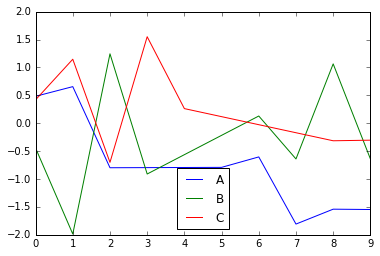

In [58]:
dff.interpolate().plot()

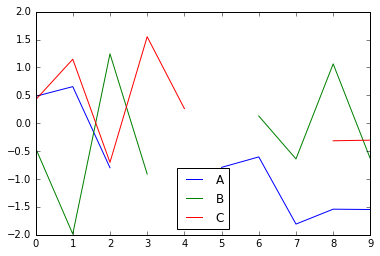

In [59]:
dff.plot()

In [60]:
# ts2.interpolate(method='time')

In [61]:
# ser.interpolate(method='values')

In [62]:
In [65]: df = pd.DataFrame({'A': [1, 2.1, np.nan, 4.7, 5.6, 6.8],
   ....:                    'B': [.25, np.nan, np.nan, 4, 12.2, 14.4]})
   ....: 

In [66]: df

,A,B
0,1.0,0.25
1,2.1,NaN
2,NaN,NaN
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


In [63]:
df.interpolate()

,A,B
0,1.0,0.25
1,2.1,1.50
2,3.4,2.75
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


In [67]:
df.interpolate(method='barycentric')

,A,B
0,1.00,0.250
1,2.10,-7.660
2,3.53,-4.515
3,4.70,4.000
4,5.60,12.200
5,6.80,14.400


In [68]:
df.interpolate(method='pchip')

,A,B
0,1.00000,0.250000
1,2.10000,0.672808
2,3.43454,1.928950
3,4.70000,4.000000
4,5.60000,12.200000
5,6.80000,14.400000


In [69]:
df.interpolate(method='spline', order=2)

,A,B
0,1.000000,0.250000
1,2.100000,-0.428598
2,3.404545,1.206900
3,4.700000,4.000000
4,5.600000,12.200000
5,6.800000,14.400000


In [70]:
df.interpolate(method='polynomial', order=2)

,A,B
0,1.000000,0.250000
1,2.100000,-4.161538
2,3.547059,-2.911538
3,4.700000,4.000000
4,5.600000,12.200000
5,6.800000,14.400000


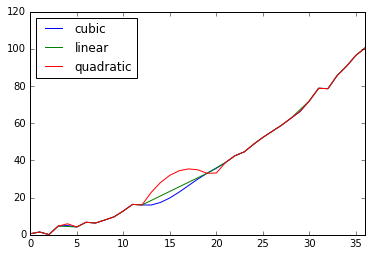

In [71]:
In [72]: np.random.seed(2)

In [73]: ser = pd.Series(np.arange(1, 10.1, .25)**2 + np.random.randn(37))

In [74]: bad = np.array([4, 13, 14, 15, 16, 17, 18, 20, 29])

In [75]: ser[bad] = np.nan

In [76]: methods = ['linear', 'quadratic', 'cubic']

In [77]: df = pd.DataFrame({m: ser.interpolate(method=m) for m in methods})

In [78]: df.plot()

In [72]:
In [79]: ser = pd.Series(np.sort(np.random.uniform(size=100)))

# interpolate at new_index
In [80]: new_index = ser.index | pd.Index([49.25, 49.5, 49.75, 50.25, 50.5, 50.75])

In [81]: interp_s = ser.reindex(new_index).interpolate(method='pchip')

In [82]: interp_s[49:51]

49.00    0.471410
49.25    0.476841
49.50    0.481780
49.75    0.485998
50.00    0.489266
50.25    0.491814
50.50    0.493995
50.75    0.495763
51.00    0.497074
dtype: float64

### Interpolation Limits

In [73]:
In [83]: ser = pd.Series([np.nan, np.nan, 5, np.nan, np.nan, np.nan, 13])

In [84]: ser.interpolate(limit=2)

0     NaN
1     NaN
2     5.0
3     7.0
4     9.0
5     NaN
6    13.0
dtype: float64

In [74]:
In [85]: ser.interpolate(limit=1)  # limit_direction == 'forward'

0     NaN
1     NaN
2     5.0
3     7.0
4     NaN
5     NaN
6    13.0
dtype: float64

In [75]:
In [86]: ser.interpolate(limit=1, limit_direction='backward')

0     NaN
1     5.0
2     5.0
3     NaN
4     NaN
5    11.0
6    13.0
dtype: float64

In [76]:
In [87]: ser.interpolate(limit=1, limit_direction='both')

0     NaN
1     5.0
2     5.0
3     7.0
4     NaN
5    11.0
6    13.0
dtype: float64

### Replacing Generic Values

In [77]:
In [88]: ser = pd.Series([0., 1., 2., 3., 4.])

In [89]: ser.replace(0, 5)

0    5.0
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [78]:
In [90]: ser.replace([0, 1, 2, 3, 4], [4, 3, 2, 1, 0])

0    4.0
1    3.0
2    2.0
3    1.0
4    0.0
dtype: float64

In [79]:
In [91]: ser.replace({0: 10, 1: 100})

0     10.0
1    100.0
2      2.0
3      3.0
4      4.0
dtype: float64

In [80]:
In [92]: df = pd.DataFrame({'a': [0, 1, 2, 3, 4], 'b': [5, 6, 7, 8, 9]})

In [93]: df.replace({'a': 0, 'b': 5}, 100)

,a,b
0,100,100
1,1,6
2,2,7
3,3,8
4,4,9


### String/Regular Expression Replacement

In [81]:
In [95]: d = {'a': list(range(4)), 'b': list('ab..'), 'c': ['a', 'b', np.nan, 'd']}

In [96]: df = pd.DataFrame(d)

In [82]:
df

,a,b,c
0,0,a,a
1,1,b,b
2,2,.,NaN
3,3,.,d


In [83]:
df.replace('.', np.nan)

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


In [84]:
df.replace(r'\s*\.\s*', np.nan, regex=True)

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


In [85]:
df.replace(['a', '.'], ['b', np.nan])

,a,b,c
0,0,b,b
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


In [86]:
 df.replace({'b': r'\s*\.\s*'}, {'b': np.nan}, regex=True)

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


In [87]:
df.replace({'b': {'b': r''}}, regex=True)

,a,b,c
0,0,a,a
1,1,,b
2,2,.,NaN
3,3,.,d


In [88]:
df.replace(regex={'b': {r'\s*\.\s*': np.nan}})

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


In [89]:
df.replace({'b': r'\s*(\.)\s*'}, {'b': r'\1ty'}, regex=True)

,a,b,c
0,0,a,a
1,1,b,b
2,2,.ty,NaN
3,3,.ty,d


In [90]:
df.replace([r'\s*\.\s*', r'a|b'], np.nan, regex=True)

,a,b,c
0,0,NaN,NaN
1,1,NaN,NaN
2,2,NaN,NaN
3,3,NaN,d


In [91]:
df.replace(regex=[r'\s*\.\s*', r'a|b'], value=np.nan)

,a,b,c
0,0,NaN,NaN
1,1,NaN,NaN
2,2,NaN,NaN
3,3,NaN,d


## Numeric Replacement

In [92]:
In [108]: df = pd.DataFrame(np.random.randn(10, 2))

In [109]: df[np.random.rand(df.shape[0]) > 0.5] = 1.5

In [110]: df.replace(1.5, np.nan)

,0,1
0,-0.844214,-1.021415
1,0.432396,-0.323580
2,0.423825,0.799180
3,1.262614,0.751965
4,NaN,NaN
5,NaN,NaN
6,-0.498174,-1.060799
7,0.591667,-0.183257
8,1.019855,-1.482465
9,NaN,NaN


In [93]:
In [111]: df00 = df.values[0, 0]

In [112]: df.replace([1.5, df00], [np.nan, 'a'])

,0,1
0,a,-1.021415
1,0.432396,-0.323580
2,0.423825,0.799180
3,1.26261,0.751965
4,NaN,NaN
5,NaN,NaN
6,-0.498174,-1.060799
7,0.591667,-0.183257
8,1.01985,-1.482465
9,NaN,NaN


In [94]:
df.replace(1.5, np.nan, inplace=True)

## Missing data casting rules and indexing

In [95]:
s = pd.Series(np.random.randn(5), index=[0, 2, 4, 6, 7])
s > 0

0    True
2    True
4    True
6    True
7    True
dtype: bool

In [96]:
crit = (s > 0).reindex(list(range(8)))

In [97]:
crit

0    True
1     NaN
2    True
3     NaN
4    True
5     NaN
6    True
7    True
dtype: object

In [98]:
crit.dtype

dtype('O')

In [100]:
In [123]: reindexed = s.reindex(list(range(8))).fillna(0)

In [124]: reindexed[crit.fillna(True)]

0    0.126504
1    0.000000
2    0.696198
3    0.000000
4    0.697416
5    0.000000
6    0.601516
7    0.003659
dtype: float64